# Digit Classification neural network
## superwisor:Dr. Farnoosh
###  presented by: Muhammad Hassanzadeh

In [1]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import cv2
# Imporing the mnist dataset
# from keras.datasets import mnist

In [2]:
# (X_train, y_train), (X_test, y_test) = mnist.load_data()
import pandas as pd


# the data, split between train and test sets and changing them to numpy arrays
df_train=pd.read_csv('mnist_train.csv',header=1).values
df_test=pd.read_csv('mnist_test.csv',header=1).values
X_train, y_train=df_train[:,1::],df_train[:,0]
X_test, y_test=df_test[:,1::],df_test[:,0]

In [3]:
X_train=X_train.reshape(60000-1, 28, 28)
X_test=X_test.reshape(9999, 28, 28)

In [4]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((59999, 28, 28), (9999, 28, 28), (59999,), (9999,))

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((59999, 28, 28), (9999, 28, 28), (59999,), (9999,))

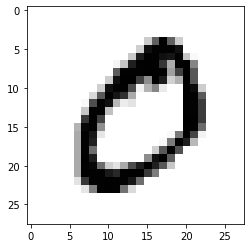

In [6]:
plt.imshow(X_train[0], cmap=plt.cm.binary)

In [7]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(80, activation="relu"),
                             tf.keras.layers.Dense(10, activation="softmax")
])

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0009),
                metrics=['accuracy'])

history_1 = model_1.fit(X_train, y_train, epochs=6)

Epoch 1/6
1875/1875 [==============================] - 7s 3ms/step - loss: 1.6182 - accuracy: 0.8505
Epoch 2/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3593 - accuracy: 0.9139
Epoch 3/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2811 - accuracy: 0.9318
Epoch 4/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2195 - accuracy: 0.9427
Epoch 5/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1730 - accuracy: 0.9536
Epoch 6/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1436 - accuracy: 0.9610


In [8]:
model_1.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1650 - accuracy: 0.9562


[0.16503450274467468, 0.956195592880249]

## Training the model with the same parameters on the normalized vesion of the data

In [9]:
X_train_normal = X_train/255
X_test_normal = X_test/255

In [10]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(80, activation="relu"),
                               tf.keras.layers.Dense(10, activation="softmax")
])

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0009),
                metrics=['accuracy'])

history_2 = model_2.fit(X_train_normal, y_train, epochs=6)

Epoch 1/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2574 - accuracy: 0.9240
Epoch 2/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1087 - accuracy: 0.9666
Epoch 3/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0778 - accuracy: 0.9756
Epoch 4/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0582 - accuracy: 0.9814
Epoch 5/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0475 - accuracy: 0.9843
Epoch 6/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0395 - accuracy: 0.9873


In [11]:
model_2.evaluate(X_test_normal, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0780 - accuracy: 0.9772


[0.07801854610443115, 0.9771977066993713]

#### Preparing the input shape for the cnn

In [12]:
input_shape_t = X_train.shape[1:]
input_shape = list()

In [13]:
for num in input_shape_t:
    input_shape.append(num)
input_shape.append(1)
input_shape = tuple(input_shape)

In [14]:
input_shape

(28, 28, 1)

### In model 3 we will use a convolutional neural network

In [15]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Conv2D(64, (3, 3), input_shape=input_shape, activation="relu"),
                               tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                               tf.keras.layers.Conv2D(64, (3, 3), input_shape=input_shape, activation="relu"),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(80, activation="relu"),
                               tf.keras.layers.Dense(10, activation="softmax")
])

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.000752),
                metrics=['accuracy'])

history_3 = model_3.fit(X_train_normal, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 58s 31ms/step - loss: 0.1286 - accuracy: 0.9604
Epoch 2/3
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0424 - accuracy: 0.9875
Epoch 3/3
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0278 - accuracy: 0.9910


In [16]:
model_3.evaluate(X_test_normal, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0323 - accuracy: 0.9886


[0.03233813866972923, 0.9885988831520081]

In [17]:

model_3.save('path/to/location')

INFO:tensorflow:Assets written to: path/to/location\assets


INFO:tensorflow:Assets written to: path/to/location\assets


## Trying the best model(model_3) on my handwriting

In [18]:
# Importing the image
file = r"C:\Users\Acer\Desktop\4_painted.png"

In [19]:
# Reading the image and turning it to grayscale
img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)


In [20]:
img.shape

(360, 356)

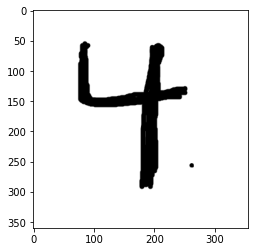

In [21]:
plt.imshow(img, cmap=plt.cm.gray)

In [22]:
# The neural netwrok can only take a specific input which is 1x28x28 in this case so we resize it to 2 dimensions
# not 3 yet because the resize function does not take 3 dims
img = cv2.resize(img, (28, 28))

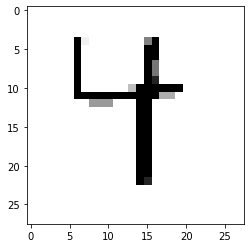

In [23]:
# After resizing
plt.imshow(img, cmap=plt.cm.gray)

### Making the input 1x28x28 and making it the right data type

In [24]:
# Adding the 3rd dimension
img = [img]

In [25]:
# Turning it to an np array
img = np.array(img)

In [26]:
img.shape

(1, 28, 28)

In [27]:
# Normalizing the image
img = img/255

In [28]:
type(img)

numpy.ndarray

In [29]:
if model_3.predict(img).argmax() == 2:
    print("Correct!")
else:
    print("Wrong")

1/1 [==============================] - 0s 95ms/step
Wrong


In [30]:

from tkinter import *
import tkinter as tk
import win32gui
from PIL import ImageGrab, Image
import numpy as np
import matplotlib.pyplot  as plt
import cv2


import joblib
# model_3= joblib.load('model_3_trained.sav')

def predict_digit(img):
    
    #resize image to 28x28 pixels
    img = img.resize((28,28))
    #convert rgb to grayscale
    img = img.convert('L')
    img = np.array(img)
    #reshaping to support our model input and normalizing
    img = img.reshape(28,28)
    plt.imshow(img,cmap='gray')
    img = np.array([img])
    img = img/255
    

    #predicting the class
    res = model_3.predict(img).argmax()
    
    return res

class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)

        self.x = self.y = 0

        # Creating elements
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross",)
        self.label = tk.Label(self, text="Thinking..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Recognise", command = self.classify_handwriting) 
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)

        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)

        #self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)
        
     


    def clear_all(self):
        self.canvas.delete("all")

    def classify_handwriting(self):
        HWND = self.canvas.winfo_id() # get the handle of the canvas
        
        rect = win32gui.GetWindowRect(HWND) # get the coordinate of the canvas
#         print(HWND,rect)
        im = ImageGrab.grab(rect)
        digit = predict_digit(im)
        self.label.configure(text= str(digit))

    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')

app = App()
mainloop()

FileNotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ram://11a1796c-33ec-4d40-835c-f7928354be15/variables/variables
 You may be trying to load on a different device from the computational device. Consider setting the `experimental_io_device` option in `tf.saved_model.LoadOptions` to the io_device such as '/job:localhost'.